# Example (Decision Boundary)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
df = pd.read_csv('./Iris-cleaned.csv')
df = df[['sepal length','sepal width','species']].copy()
df.head(3)

,sepal length,sepal width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa


train accuracy = 0.817   test accuracy = 0.833


Text(0.5, 1.0, 'test set')

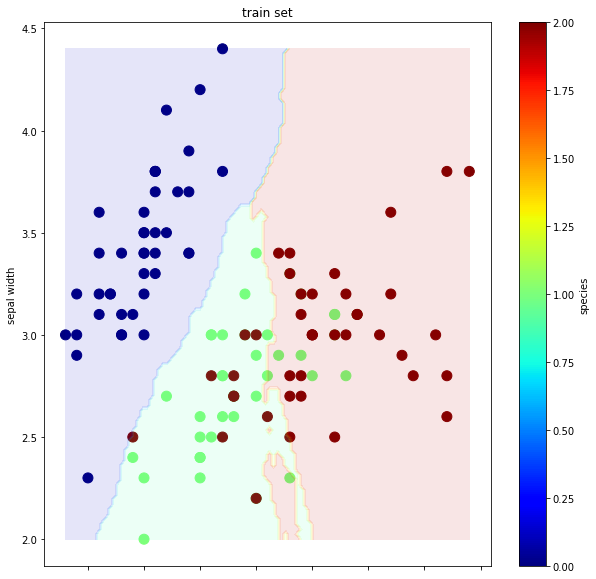

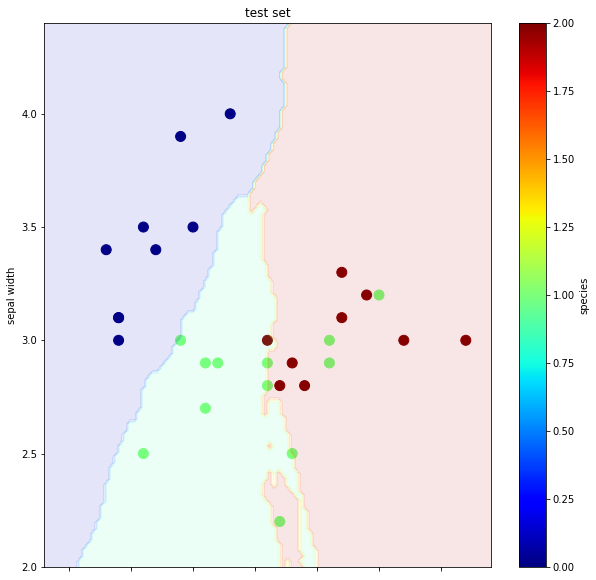

In [3]:
hyper_parm = 20
N = 100
alpha = 0.1
#cmap = 'rainbow'
cmap = 'jet'

# select classifier
clf = KNeighborsClassifier(n_neighbors=hyper_parm)

# create 2D grid of points
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
XX1,XX2 = np.meshgrid(
    np.linspace(X1.min(),X1.max(),N),
    np.linspace(X2.min(),X2.max(),N))

# integer code categories
df.iloc[:,2] = LabelEncoder().fit_transform(df.iloc[:,2])

# train-test split
df_test  = df.sample(frac=0.2)
df_train = df.drop(df_test.index)
features_train = df_train.iloc[:,[0,1]]
target_train   = df_train.iloc[:,2]
features_test  = df_test.iloc[:,[0,1]]
target_test    = df_test.iloc[:,2]

# train classifier
clf.fit(features_train,target_train)

# compute train and test score
acc_train = clf.score(features_train,target_train)
acc_test  = clf.score(features_test,target_test)
print('train accuracy =',acc_train.round(3),'  test accuracy =',acc_test.round(3))

# predict targets on 2D grid
Y = clf.predict(np.stack([XX1.ravel(),XX2.ravel()],axis=1))
YY = Y.reshape(XX1.shape)

# plot training set
ax1 = df_train.plot.scatter(x=0,y=1,c=2,cmap=cmap,s=100,figsize=(10,10))
ax1.contourf(XX1,XX2,YY,alpha=alpha,cmap=cmap)
plt.title('train set')

# plot test set
ax2 = df_test.plot.scatter(x=0,y=1,c=2,cmap=cmap,s=100,figsize=(10,10))
ax2.contourf(XX1,XX2,YY,alpha=alpha,cmap=cmap)
plt.title('test set')